In [254]:
import pandas as pd
import numpy as np

from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 

from astropy import units as u
from astropy import coordinates as coord
from astropy.io import fits
from astropy.wcs import WCS
from astropy.visualization.wcsaxes import WCSAxes
from astropy.utils.data import get_pkg_data_filename

from urllib.request import urlretrieve


# Define Shell function for constant E. The general 
# modeling space is around 100-200 parsecs. E is constant in 
# this function, resulting in D being constant.


# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

# R -> The distance from the centre
# t -> The time
# D -> Diffusion coefficient
# E is the energy, no energy is lost in this system

# n = [0.1, 0.5]
# Esn ~ e52
# alpha = []

@u.quantity_input(E = u.erg)
def dNdE(E, Emax = 5*u.PeV, Emin=1*u.GeV, eta = 0.25, Esn = 1e52*u.erg, alpha = 1):
    dNdE = (eta*Esn*(-alpha+2))/(Emax**(2-alpha)-Emin**(2-alpha))*E**-alpha
    return dNdE


@u.quantity_input(t=u.yr, E=u.eV)
def Rshell(E, n0=10/u.cm**3, ESN=1e52*u.erg, Emax = 5*u.PeV, beta = 2.48):
    R = 0.31*(ESN/(1e51*u.erg))**(1/5)*(n0/(u.cm**-3))**(-1/5)*(Tesc(E, Emax, beta)/u.yr)**(2/5) *u.pc
    return R.to(u.pc)


@u.quantity_input(E=u.erg)
def Tesc(E, Emax = 5*u.PeV, beta = 2.48):
    ts = 1600*u.yr
    return (ts*(E/Emax)**(-1/beta)).to(u.yr)



@u.quantity_input(E=u.erg)
def diffusion(E, B = 50 * u.uG, x = 0.1, delta = 0.5):
    Dn = 3*10**27 * 0.1 
    dif = x * Dn * ((3*E/(u.GeV))/(10*B/(u.uG)))**delta
    return dif * u.cm**2 * u.s**-1

@u.quantity_input(E=u.erg, R=u.pc, t=u.yr)
def distribution(E, R, t, alpha = 2.7):
    Rdif = 2 * np.sqrt(diffusion(E) * (t - Tesc(E)))

    first1 = (np.pi**(1/2))*(Rdif**2) 
    first2 = 2*(np.pi**(1/2)*(Rshell(E))**2) 
    first3 = 4*Rshell(E)*(Rdif)
    
    firstT = first1 + first2 + first3

    dist = dNdE(E)*(firstT/(np.pi**(1/2)*(Rdif)**2))**(-1)*(1/(np.pi**(3/2)*(Rdif)**3))*np.exp(-(R-Rshell(E))**2/(Rdif)**2)

    return dist.to(1/(u.TeV * u.cm**3))



E = float(input("At what energy ? ").strip())
if(E == 0):
    E = 5*u.TeV

T = float(input("At what time ? ").strip())
if(T == 0):
    T = 50*u.kyr

R = float(input("At what radius ? ").strip())
if(R == 0):
    R = 50*u.pc



Text(0.9, 0.9, 'Energy = 5.0 TeV')

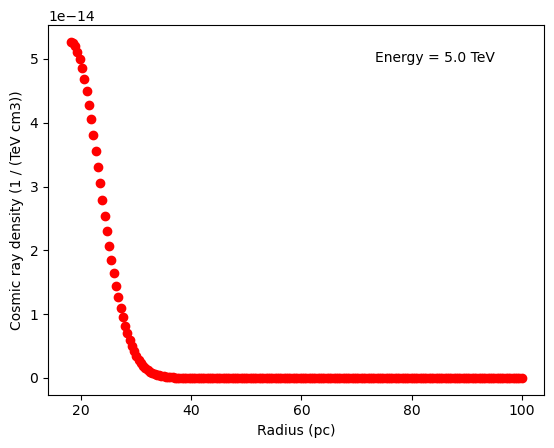

In [255]:
Rs = np.linspace(Rshell(E), 100*u.pc, 200)

for R in Rs:
    plt.plot(R, distribution([E]*u.TeV, R, T), 'ro')

plt.xlabel(f"Radius ({Rs.unit})")
plt.ylabel(f"Cosmic ray density ({distribution([E]*u.TeV, R, T).unit})")
plt.text(0.9, 0.9, f"Energy = {E}", transform = plt.gca().transAxes, horizontalalignment="right")


Text(0.9, 0.9, 'Energy = 50.0 TeV')

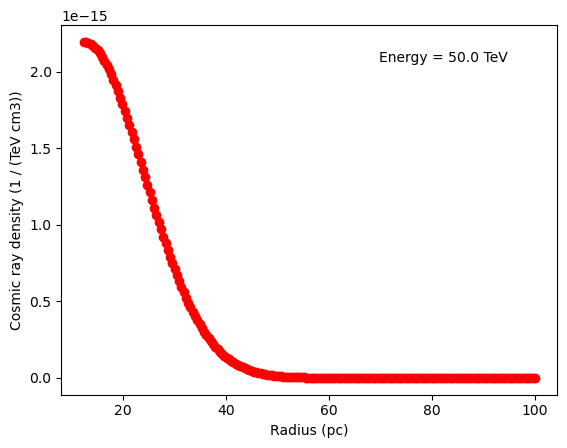

In [251]:
E = 50*u.TeV

Rs = np.linspace(Rshell(E), 100*u.pc, 200)

for R in Rs:
    plt.plot(R, distribution([E]*u.TeV, R, T), 'ro')

plt.xlabel(f"Radius ({Rs.unit})")
plt.ylabel(f"Cosmic ray density ({distribution([E]*u.TeV, R, T).unit})")
plt.text(0.9, 0.9, f"Energy = {E}", transform = plt.gca().transAxes, horizontalalignment="right")

25929.69461986109 yr 10246.406833915647 yr


Text(0.9, 0.8, 'Radius = 20.0 pc')

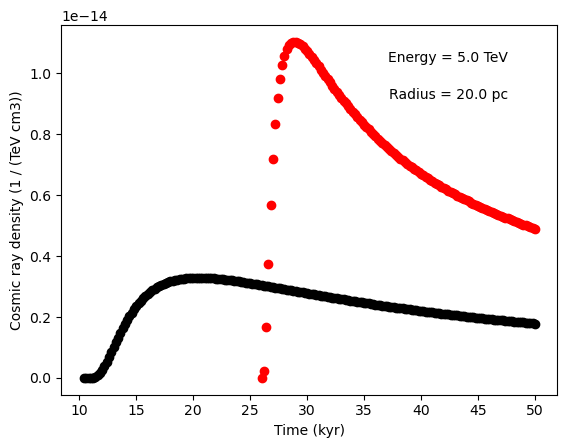

In [285]:
ts = np.linspace(Tesc(E*10).to(u.kyr).value, (50*u.kyr).to(u.kyr).value, 200)*u.kyr

R = 20 * u.pc
E = 5*u.TeV

# ratio = np.max(distribution([E]*u.TeV, R, T))/np.max(distribution([10*E]*u.TeV, R, T))

for T in ts:
    plt.plot(T, 1e-1*distribution([E]*u.TeV, R, T), 'ro')
    plt.plot(T, distribution([E*10]*u.TeV, R, T), 'ko') 

print(Tesc(E), Tesc(10*E))

plt.xlabel(f"Time ({ts.unit})")
plt.ylabel(f"Cosmic ray density ({distribution([E]*u.TeV, R, T).unit})")
plt.text(0.9, 0.9, f"Energy = {E}", transform = plt.gca().transAxes, horizontalalignment="right")
plt.text(0.9, 0.8, f"Radius = {R}", transform = plt.gca().transAxes, horizontalalignment="right")


#plt.yscale("log")

In [286]:
a = np.linspace(1, 10)
mask = a > 5
a[mask]

array([ 5.04081633,  5.2244898 ,  5.40816327,  5.59183673,  5.7755102 ,
        5.95918367,  6.14285714,  6.32653061,  6.51020408,  6.69387755,
        6.87755102,  7.06122449,  7.24489796,  7.42857143,  7.6122449 ,
        7.79591837,  7.97959184,  8.16326531,  8.34693878,  8.53061224,
        8.71428571,  8.89795918,  9.08163265,  9.26530612,  9.44897959,
        9.63265306,  9.81632653, 10.        ])

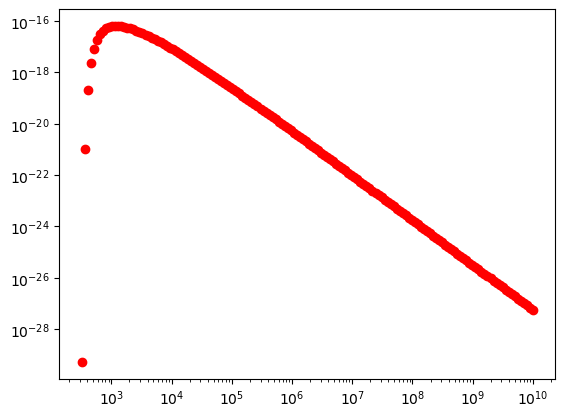

In [287]:
Es = np.logspace(0, 10, 200)*u.TeV

plt.plot(Es, distribution(Es, R, t), 'ro')
plt.yscale("log")
plt.xscale("log")